In [4]:
with open('data/names.txt', 'r') as f:
    words = f.read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [3]:
import torch

In [5]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [6]:
chars = ['.']
chars += sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
itos = {i:s for s,i in stoi.items()}
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [7]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [13]:
P = N.float()
P /= N.sum(1, keepdim=True)

In [41]:
for _ in range(30):
    ix = 0
    out = []
    while True:
        ix = torch.multinomial(P[ix], 1, True).item()
        out.append(itos[ix])
        if (ix == 0):
            break
    print(''.join(out))

kae.
merahavah.
kake.
bra.
lyesahaitliarer.
ixieze.
a.
tan.
br.
julengnayn.
con.
c.
phlare.
lubrdiziylaylesa.
an.
za.
a.
mud.
bh.
hyleliusari.
anaee.
jahianielenaneder.
kargeriaka.
iyn.
ma.
cawbeyeriyaijarelanolueaxa.
h.
ge.
cannsayarofindedelly.
jon.


In [197]:
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs, ys

(tensor([ 0,  5, 13,  ..., 25, 26, 24]),
 tensor([ 5, 13, 13,  ..., 26, 24,  0]))

In [45]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

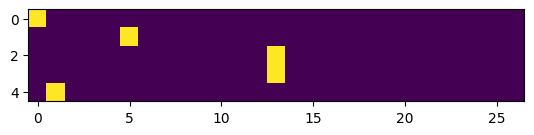

In [46]:
import matplotlib.pyplot as plt
plt.imshow(xenc)

In [ ]:
W = torch.randn((27, 27), requires_grad=True)
xenc @ W

In [72]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True) #These two lines are the softmax
probs

tensor([[0.0040, 0.0487, 0.0872, 0.2047, 0.0727, 0.0296, 0.0523, 0.0125, 0.0165,
         0.0388, 0.0221, 0.0077, 0.0871, 0.0084, 0.0122, 0.0451, 0.0304, 0.0054,
         0.0648, 0.0112, 0.0072, 0.0731, 0.0039, 0.0318, 0.0071, 0.0056, 0.0101],
        [0.0236, 0.0219, 0.0024, 0.0317, 0.0061, 0.0440, 0.0437, 0.0659, 0.0084,
         0.0089, 0.0061, 0.0203, 0.0068, 0.0351, 0.0152, 0.0061, 0.0267, 0.0173,
         0.0956, 0.0354, 0.0121, 0.0316, 0.0371, 0.0234, 0.1822, 0.0378, 0.1546],
        [0.0211, 0.0046, 0.0179, 0.0560, 0.0079, 0.0147, 0.0969, 0.0145, 0.0062,
         0.0899, 0.0199, 0.0927, 0.0179, 0.0034, 0.0054, 0.0138, 0.0308, 0.0337,
         0.0450, 0.0898, 0.0212, 0.0439, 0.0162, 0.0515, 0.0698, 0.0153, 0.1000],
        [0.0211, 0.0046, 0.0179, 0.0560, 0.0079, 0.0147, 0.0969, 0.0145, 0.0062,
         0.0899, 0.0199, 0.0927, 0.0179, 0.0034, 0.0054, 0.0138, 0.0308, 0.0337,
         0.0450, 0.0898, 0.0212, 0.0439, 0.0162, 0.0515, 0.0698, 0.0153, 0.1000],
        [0.0028, 0.0032,

In [77]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print(f"Bigram: {itos[x]}{itos[y]}")
    print(f"Probs: {probs[i]}")
    p = probs[i, y]
    print(f"Label: {p.item()}")
    print(f"Log Likelihood: {torch.log(p).item()}")
    nlls[i] = -torch.log(p).item()
    print(f"Negative Log Likelihood: {nlls[i]}")
    print("----------------")
print(f"Avg NLL: {nlls.mean().item()}")

Bigram: .e
Probs: tensor([0.0040, 0.0487, 0.0872, 0.2047, 0.0727, 0.0296, 0.0523, 0.0125, 0.0165,
        0.0388, 0.0221, 0.0077, 0.0871, 0.0084, 0.0122, 0.0451, 0.0304, 0.0054,
        0.0648, 0.0112, 0.0072, 0.0731, 0.0039, 0.0318, 0.0071, 0.0056, 0.0101])
Label: 0.029570626094937325
Log Likelihood: -3.5209736824035645
Negative Log Likelihood: 3.5209736824035645
----------------
Bigram: em
Probs: tensor([0.0236, 0.0219, 0.0024, 0.0317, 0.0061, 0.0440, 0.0437, 0.0659, 0.0084,
        0.0089, 0.0061, 0.0203, 0.0068, 0.0351, 0.0152, 0.0061, 0.0267, 0.0173,
        0.0956, 0.0354, 0.0121, 0.0316, 0.0371, 0.0234, 0.1822, 0.0378, 0.1546])
Label: 0.03510763496160507
Log Likelihood: -3.349336624145508
Negative Log Likelihood: 3.349336624145508
----------------
Bigram: mm
Probs: tensor([0.0211, 0.0046, 0.0179, 0.0560, 0.0079, 0.0147, 0.0969, 0.0145, 0.0062,
        0.0899, 0.0199, 0.0927, 0.0179, 0.0034, 0.0054, 0.0138, 0.0308, 0.0337,
        0.0450, 0.0898, 0.0212, 0.0439, 0.0162, 0.0515, 0

In [81]:
ys

tensor([ 5, 13, 13,  1,  0])

In [83]:
probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0296),
 tensor(0.0351),
 tensor(0.0034),
 tensor(0.0046),
 tensor(0.0028))

In [84]:
labels = torch.tensor([probs[i, y] for i, y in enumerate(ys)])
labels

tensor([0.0296, 0.0351, 0.0034, 0.0046, 0.0028])

In [85]:
probs[torch.arange(5), ys]

tensor([0.0296, 0.0351, 0.0034, 0.0046, 0.0028])

In [200]:
def train_loop(W, xs, ys, lr, epoch):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = torch.matmul(xenc, W)
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    labels = probs[torch.arange(len(ys)), ys]
    loss = -labels.log().mean()

    W.grad = None
    loss.backward()

    W.data -= lr * W.grad
    
    print(f"Epoch: {epoch+1} | Loss: {loss: .5f}")

In [232]:
W = torch.randn((27, 27), requires_grad=True)

In [249]:
epochs = 20
lr = 75

for epoch in range(epochs):
  train_loop(W, xs, ys, lr, epoch)

Epoch: 1 | Loss:  2.45779
Epoch: 2 | Loss:  2.45772
Epoch: 3 | Loss:  2.45777
Epoch: 4 | Loss:  2.45770
Epoch: 5 | Loss:  2.45775
Epoch: 6 | Loss:  2.45767
Epoch: 7 | Loss:  2.45773
Epoch: 8 | Loss:  2.45765
Epoch: 9 | Loss:  2.45770
Epoch: 10 | Loss:  2.45763
Epoch: 11 | Loss:  2.45768
Epoch: 12 | Loss:  2.45761
Epoch: 13 | Loss:  2.45766
Epoch: 14 | Loss:  2.45759
Epoch: 15 | Loss:  2.45764
Epoch: 16 | Loss:  2.45757
Epoch: 17 | Loss:  2.45762
Epoch: 18 | Loss:  2.45755
Epoch: 19 | Loss:  2.45760
Epoch: 20 | Loss:  2.45753


In [250]:
W.exp()

tensor([[1.2622e-02, 6.6671e+00, 1.9741e+00, 2.3309e+00, 2.5547e+00, 2.3143e+00,
         6.2998e-01, 1.0110e+00, 1.3209e+00, 8.9306e-01, 3.6614e+00, 4.4793e+00,
         2.3762e+00, 3.8368e+00, 1.7322e+00, 5.9521e-01, 7.7815e-01, 1.3857e-01,
         2.4775e+00, 3.1065e+00, 1.9771e+00, 1.1739e-01, 5.6799e-01, 4.6367e-01,
         2.0209e-01, 8.0839e-01, 1.4041e+00],
        [8.5393e+00, 8.7130e-01, 8.4776e-01, 7.3636e-01, 1.6352e+00, 1.0848e+00,
         2.0976e-01, 2.6301e-01, 3.6801e+00, 2.5951e+00, 2.7397e-01, 8.9013e-01,
         3.9942e+00, 2.5698e+00, 9.4280e+00, 9.8639e-02, 1.2835e-01, 9.3965e-02,
         5.1878e+00, 1.7549e+00, 1.0770e+00, 5.9678e-01, 1.3080e+00, 2.5205e-01,
         2.8494e-01, 3.2302e+00, 6.8146e-01],
        [6.8272e+00, 1.9693e+01, 2.0411e+00, 3.7171e-01, 3.7457e+00, 4.0432e+01,
         2.3702e-01, 2.4333e-01, 2.2553e+00, 1.3233e+01, 2.4425e-01, 1.7405e-01,
         6.1414e+00, 2.7301e-01, 4.2592e-01, 6.2660e+00, 2.2343e-01, 2.2036e-01,
         5.2042e+

In [1]:
for i in range(5):

    out = []
    ix = 0

    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = torch.matmul(xenc, W)
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(probs, 1, True).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print("".join(out))

NameError: name 'F' is not defined